# 第96問 国名に関するベクトルの抽出

In [1]:
from gensim.models import Word2Vec
import cPickle as pickle

In [2]:
# 学習済みモデルのロード
model = Word2Vec.load_word2vec_format("./data/wiki_vector.bin", binary=True)

In [3]:
with open("./data/country_name.txt", "r") as f, open("./data/q96_country_vec.pkl", "w") as output, open("./data/q96_i2c.pkl", "w") as idx_file:
    country_lis = []
    for line in f:
        country = line.rstrip().replace(" ", "_")
        if country in model:
            country_lis.append(country)
    matrix = []
    i2c = {} #idx to country name
    for n, country in enumerate(country_lis):
        matrix.append(model[country])
        i2c[n] = country
    pickle.dump(matrix, output)
    pickle.dump(i2c,idx_file)
    

# 第97問 k-meansクラスタリング

In [4]:
import cPickle as pickle
from sklearn.cluster import KMeans
from itertools import groupby

In [5]:
labels = KMeans(n_clusters=5).fit(matrix).labels_

In [6]:
label_lis = [(i2c[n], label) for n,label in enumerate(labels)]
label_lis = sorted(label_lis, key=lambda x:x[1])

In [7]:
for cluster, items in groupby(label_lis, key=lambda x: x[1]):
    print "Cluster: {}".format(cluster)
    print " ".join([item[0] for item in items])
    

Cluster: 0
American_Samoa Anguilla Antarctica Antigua Aruba Bahamas Barbados Bermuda British_Virgin_Islands Cape_Verde Cook_Islands Dominica Falkland_Islands Fiji French_Guiana French_Polynesia Gibraltar Greenland Grenada Guadeloupe Guam Guinea Guyana Jamaica Kiribati Madagascar Marshall_Islands Martinique Mauritius Mayotte Federated_States_of_Micronesia Montserrat Nauru Netherlands_Antilles New_Caledonia Northern_Mariana_Islands Palau Papua_New_Guinea Pitcairn_Islands Saint_Kitts_and_Nevis Saint_Lucia Saint_Pierre_and_Miquelon Saint_Vincent_and_the_Grenadines Samoa Seychelles Solomon_Islands Suriname Tonga Trinidad_and_Tobago Turks_and_Caicos_Islands Tuvalu United_States_Virgin_Islands Vanuatu
Cluster: 1
Albania Andorra Armenia Austria Azerbaijan Belarus Belgium Bosnia_and_Herzegovina Bulgaria Croatia Cyprus Czech_Republic Denmark Estonia Finland France Germany Greece Hungary Iceland Italy Kazakhstan Latvia Liechtenstein Lithuania Luxembourg Macedonia Malta Moldova Monaco Netherlands 

# 第98問 Ward法によるクラスタリング

In [8]:
from scipy.cluster.hierarchy import linkage,dendrogram
from matplotlib import pyplot as plt
import numpy as np
# 参考: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
# linkageメソッドの戻り値などの説明など詳しい

In [9]:
Z = linkage(matrix, 'ward')

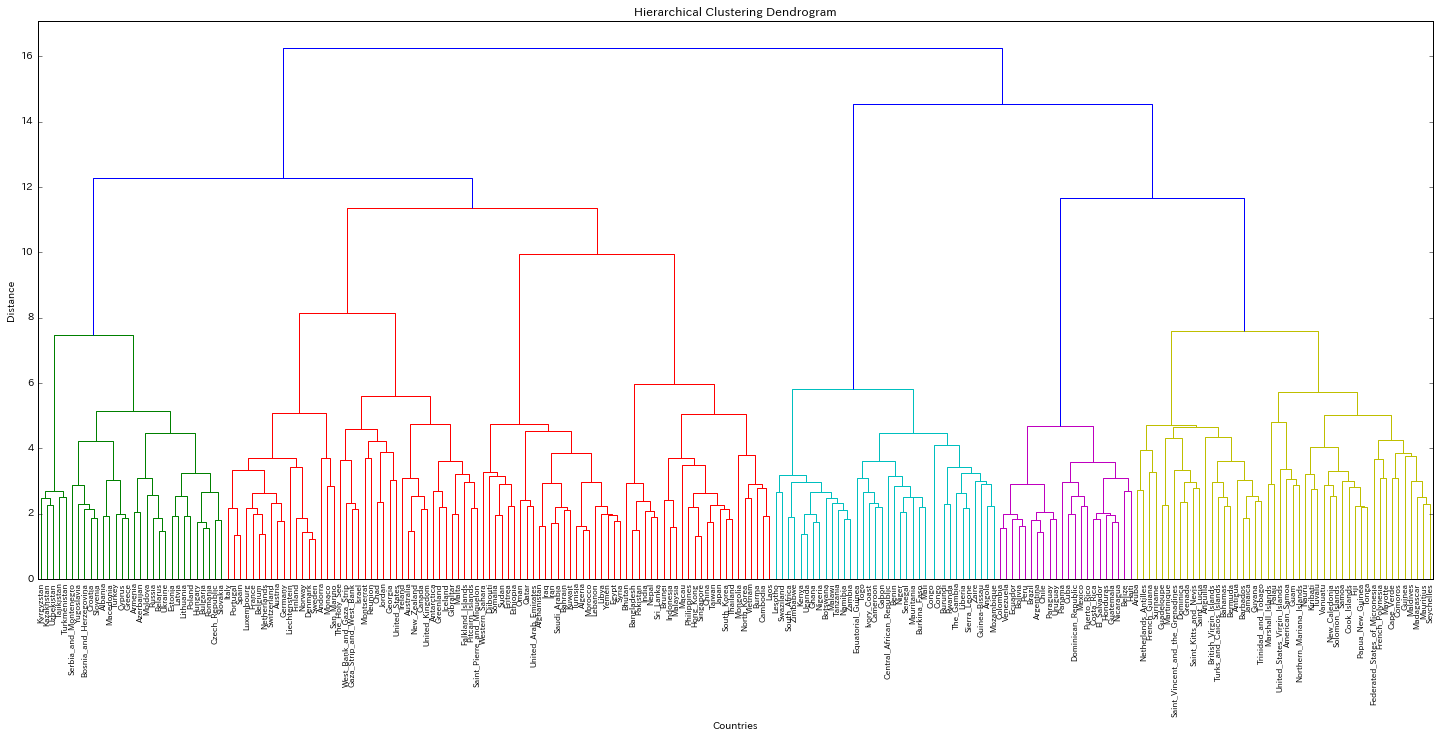

In [10]:
plt.figure(figsize=(25,10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Countries")
plt.ylabel("Distance")
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels = [w for i,w in sorted(i2c.items())]
    )
plt.show()

# 第99問 T-SNEによる可視化

In [11]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [12]:
X = TSNE(n_components=2, random_state=0).fit_transform(matrix)
labels = KMeans(n_clusters=5).fit(matrix).labels_

In [13]:
x_min = np.min(X,0)
x_max = np.max(X,0)
X = (X - x_min) / (x_max - x_min) #正規化...

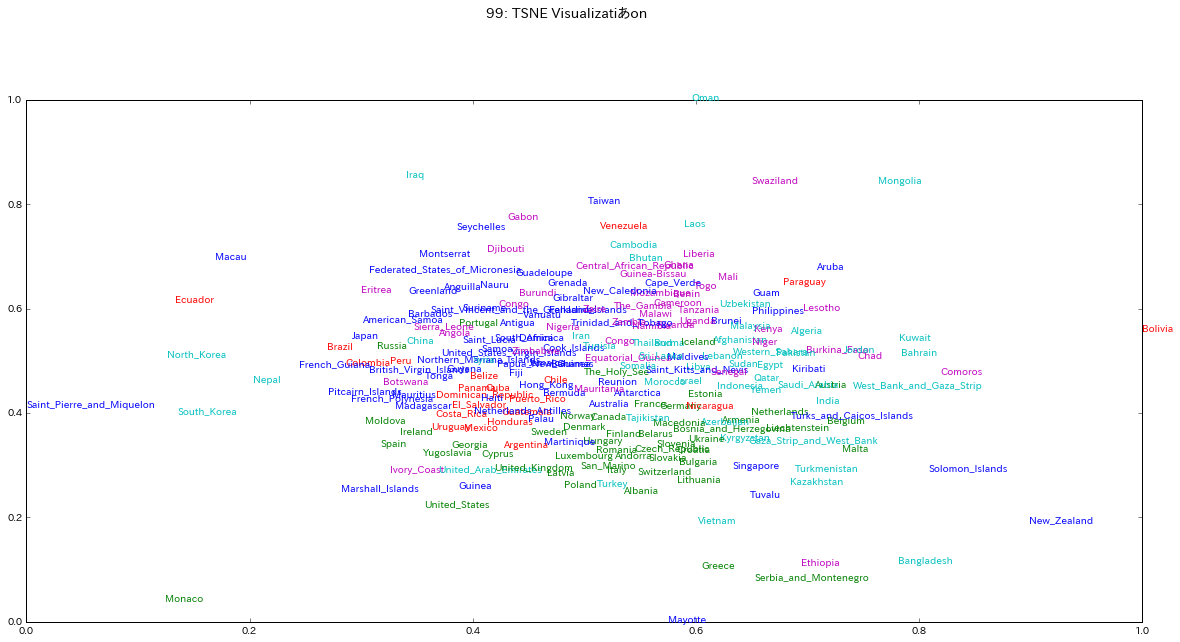

In [14]:
fig = plt.figure(figsize=[20,10])
fig.suptitle('99: TSNE Visualization', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

colors = ["b", "g", "r", "c", "m"]

for c, vec, n in zip(labels, X, range(len(labels))):
    ax.text(vec[0], vec[1], i2c[n], color=colors[c], fontsize=10)
